# Pymaceuticals Inc.
---

### Analysis

This analysis examines data from a study using mice to evaluate the efficacy of various cancer drugs. The study included an approximately equal number of male and female mice with tumors, tracking tumor volumes from the start of the trial and at specific timepoints after administering the drugs.

### Comparison of Drug Regimens
To begin, I created a bar graph to compare all the drugs in the study's regimen and determine which might be more effective. Capomulin and Ramicane stood out with the highest number of observed timepoints, suggesting they had the most detailed data and potentially the greatest impact on tumor volume.

Next, I focused on just four drug regimens. Once again, Capomulin and Ramicane emerged as the better performers. This conclusion is supported by the shorter boxes in the boxplot, which indicate a smaller Interquartile Range (IQR). A smaller IQR demonstrates that the drugs have consistent effects across treated mice. Consistency is a crucial factor in drug studies, as it translates to more reliable and predictable outcomes.

### Capomulin Tumor Response Over Time
To gain further insight, I isolated the results for the drug Capomulin. The line graph revealed an interesting pattern: initially, the tumor volume appeared to increase after treatment began. However, by the 20-day mark, the tumor volume shrank dramatically. After this, there was a slight rebound in size before another significant reduction. This line graph highlights Capomulin’s strong response in reducing tumor volume over time.

### Correlation Between Weight and Tumor Volume
Finally, I examined the relationship between mouse weight and average tumor volume for the Capomulin regimen. A scatter plot with a linear regression model revealed a positive correlation between weight and tumor volume, meaning that heavier mice tended to have larger tumors. While this trend was evident, some variability suggests that other factors may influence tumor size. This relationship could indicate the need for further studies to explore whether drug dosage adjustments based on weight might improve consistency in outcomes.

### Conclusion
In Conclusion, Capomulin appears to have great potential in reducing tumor size consistently and effectively. Its strong response and consistent results make it a promising candidate for further research and development. 
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
#I looked up on chatgpt .nunique to count the number of unique values 
combined_data["Mouse ID"].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Identify duplicates based on Mouse ID and Timepoint
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
print(duplicate_mice)


['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_id = combined_data[combined_data["Mouse ID"]=='g989']
duplicate_mouse_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df= combined_data[combined_data['Mouse ID']!='g989']
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
stats_summary = pd.DataFrame({'Mean Tumor Volume': mean, 'Median Tumor Volume': median, 'Tumor Volume Variance': var, 'Tumor Volume Std. Dev.': std, 'Tumor Volume Std. Err.': sem})
stats_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

##used chatgpt to learn about this method
# Using the aggregation method, produce the same summary statistics in a single line
agg_stats_summary = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(Mean='mean', Median='median', Var='var', Std='std', SEM='sem')
agg_stats_summary

,Mean,Median,Var,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
#Angel showed me another way to use the aggregation method to generate a summary statistics table
##This way prints out the Tumor Volume label for the columns
agg_stats_summary = cleaned_df.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
agg_stats_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
cleaned_df['Drug Regimen'].value_counts()

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

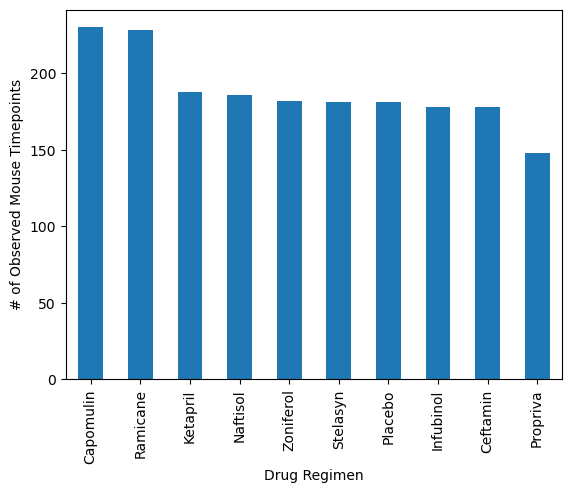

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = cleaned_df['Drug Regimen'].value_counts()
drug_counts.plot(kind='bar')  
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

In [12]:
cleaned_df['Drug Regimen'].value_counts()


Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

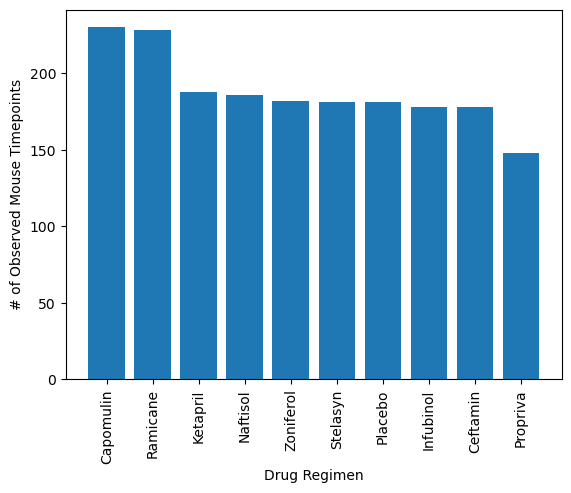

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#I used Chatgpt to explain this logic and code for me.  
drug_counts = cleaned_df['Drug Regimen'].value_counts()
x = drug_counts.index      #extract the drug names (key) 
y = drug_counts.values    #extract the total count (value) for each regimen
plt.bar(x,y)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

In [14]:
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [70]:
mice_df = cleaned_df[['Mouse ID','Sex']].drop_duplicates()
sex_counts = mice_df['Sex'].value_counts()
sex_counts.index

Index(['Male', 'Female'], dtype='object', name='Sex')

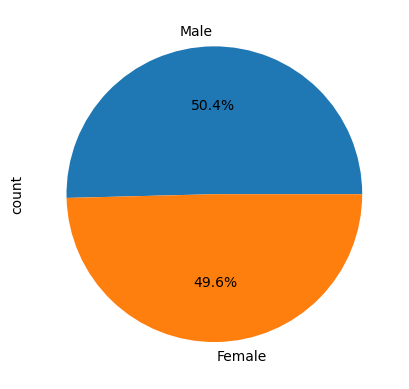

In [99]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
sex_counts = mice_df['Sex'].value_counts()
# Get the unique mice with their gender
sex_counts.plot.pie(autopct='%1.1f%%')
# Make the pie chart
plt.show()

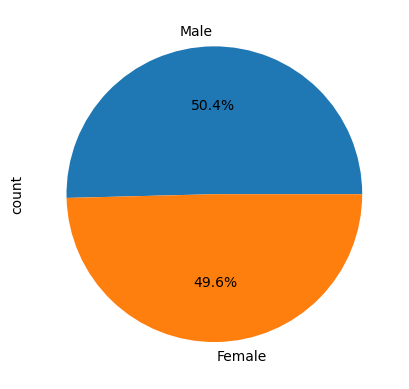

In [ ]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
sex_counts = mice_df['Sex'].value_counts()
# Get the unique mice with their gender
label = sex_counts.index
sex_num = sex_counts.values

# Make the pie chart
plt.pie(sex_num, labels=label, autopct='%1.1f%%', startangle=0)
plt.ylabel('count')
plt.show()


## Quartiles, Outliers and Boxplots

In [110]:
max_timepoint = cleaned_df.groupby('Mouse ID')['Timepoint'].max()
max_timepoint

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [101]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = cleaned_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_time_df=pd.merge(max_timepoint,cleaned_df, on=["Mouse ID", "Timepoint"], how='left')
max_time_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [102]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = max_time_df[max_time_df['Drug Regimen']==treatment]
    tumor_vol = treatment_data['Tumor Volume (mm3)']

    # add subset
    tumor_vol_data.append(tumor_vol)

    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol[(tumor_vol<lower_bound) | (tumor_vol>upper_bound)]

    print(f"{treatment} potential outliers: {outliers}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


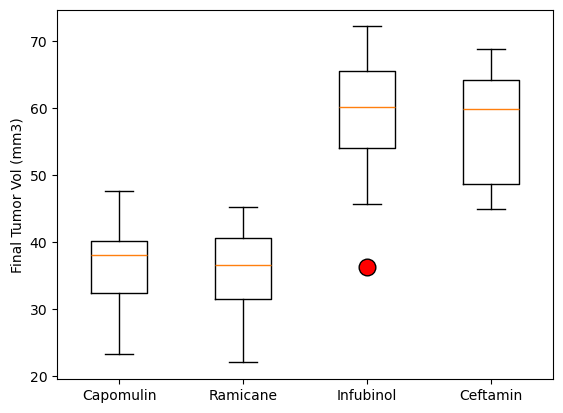

In [ ]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
##Angel helpled me with the code to add the marker and size
plt.boxplot(tumor_vol_data, tick_labels=treatments, flierprops={'markerfacecolor': 'red', 'markersize': 12})
plt.ylabel('Final Tumor Vol (mm3)')
plt.show()

## Line and Scatter Plots

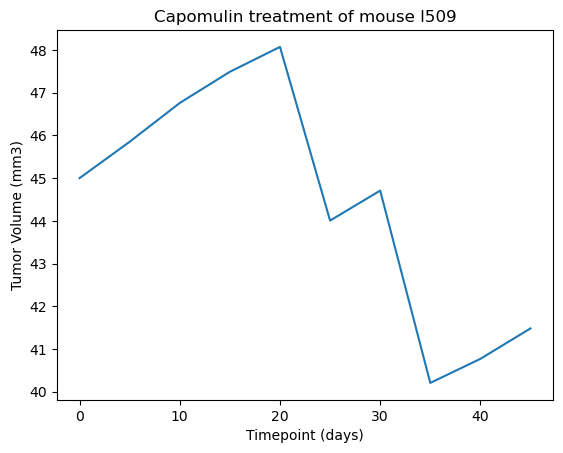

In [111]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = cleaned_df[cleaned_df['Drug Regimen']=='Capomulin']
capomulin_data
mouse_id = 'l509'
mouse_data = capomulin_data[capomulin_data['Mouse ID']==mouse_id]
mouse_data
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Capomulin treatment of mouse l509')
plt.show()

In [114]:
capomulin_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


In [115]:
##Angel helped me with this code to add the Weight column
avg_tumor_vol = capomulin_data.groupby('Mouse ID')[['Tumor Volume (mm3)', 'Weight (g)']].mean()
avg_tumor_vol


,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22.0
b742,40.083699,21.0
f966,36.505973,17.0
g288,41.990097,19.0
g316,44.613344,22.0
i557,44.805810,24.0
i738,39.141053,20.0
j119,44.465236,23.0
j246,43.216925,21.0


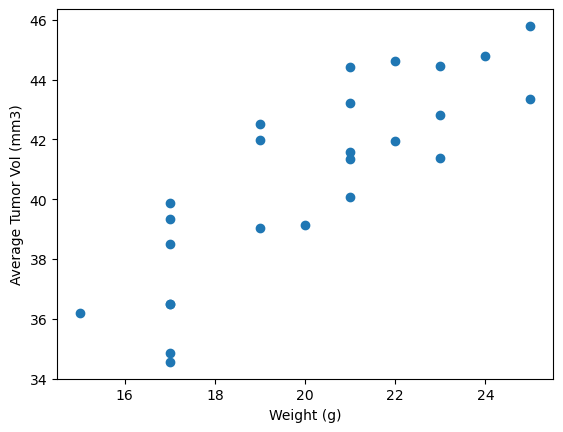

In [116]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Vol (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


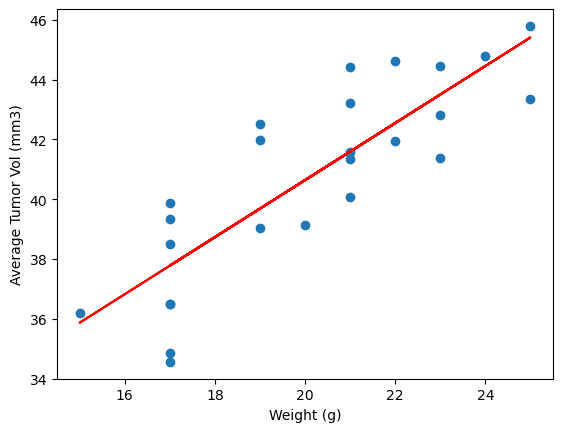

In [117]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
###I worked with Angel during my tutoring session to get this code
correlation = round(st.pearsonr(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")
model = st.linregress(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])
y_values = avg_tumor_vol['Weight (g)'] * model[0]+ model[1]

plt.scatter(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])
plt.plot(avg_tumor_vol['Weight (g)'], y_values, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Vol (mm3)')
plt.show()